In [1]:
import sys
sys.path.append("..")

from plotting_tools import *

In [ ]:
# Calculate mean location sizes per type
mean_loc_size = {'Home': 0, 'School': 0, 'Work': 0, 'Recreation': 0, 'Shop': 0}
person_locs_path = '1_persons_locs.csv'
person_locs_file = pd.read_csv(person_locs_path)
# Compute counts per location
locs = {
    'Home': person_locs_file['Home'].value_counts().to_dict(),
    'School': person_locs_file.loc[person_locs_file['School'] > 0, 'School'].value_counts().to_dict(),
    'Work': person_locs_file.loc[person_locs_file['Work'] > 0, 'Work'].value_counts().to_dict(),
    'Recreation': person_locs_file['Event'].value_counts().to_dict(),
    'Shop': person_locs_file['Shop'].value_counts().to_dict(),
}
# Mean size for each location type
mean_loc_size['Home'] = (sum(locs['Home'].values()) / len(locs['Home'])) if locs['Home'] else 0
mean_loc_size['School'] = (sum(locs['School'].values()) / len(locs['School'])) if locs['School'] else 0
mean_loc_size['Work'] = (sum(locs['Work'].values()) / len(locs['Work'])) if locs['Work'] else 0
mean_loc_size['Recreation'] = (sum(locs['Recreation'].values()) / len(locs['Recreation'])) if locs['Recreation'] else 0
mean_loc_size['Shop'] = (sum(locs['Shop'].values()) / len(locs['Shop'])) if locs['Shop'] else 0

In [3]:
num_sims = 100

In [ ]:
# Calculate mean maximum contacts per location type across simulations
index_to_loctype = {0: 'Home', 1: 'School', 2: 'Work', 3: 'Recreation', 4: 'Shop'}
mean_max_contacts = {'Home': 0, 'School': 0, 'Work': 0, 'Recreation': 0, 'Shop': 0}
simulation_result_path = ''
for sim in range(1, num_sims + 1):
    contact_file = pd.read_csv(f'{simulation_result_path}{sim}_contacts.csv', sep=" ")
    for loc_type in index_to_loctype.keys():
        max_contacts = contact_file[contact_file['loc_type'] == loc_type]['max_num_agents'].max()
        mean_max_contacts[index_to_loctype[loc_type]] += max_contacts
        
mean_max_contacts['Home'] /= num_sims
mean_max_contacts['School'] /= num_sims
mean_max_contacts['Work'] /= num_sims
mean_max_contacts['Recreation'] /= num_sims
mean_max_contacts['Shop'] /= num_sims

In [ ]:
# Calculate mean number of infections per location type across simulations
mean_infections = {'Home': 0, 'School': 0, 'Work': 0, 'Recreation': 0, 'Shop': 0}
infections_per_loc_type_path = 'num_agents_infections_loctype.txt'
infections_per_loc_type_file = pd.read_csv(infections_per_loc_type_path, sep=",")

for loc_type in index_to_loctype.keys():
    total_new_infections = infections_per_loc_type_file[infections_per_loc_type_file['locType'] == loc_type]['NewInfections'].sum()
    mean_infections[index_to_loctype[loc_type]] = total_new_infections
    
mean_infections['Home'] /= num_sims
mean_infections['School'] /= num_sims
mean_infections['Work'] /= num_sims
mean_infections['Recreation'] /= num_sims
mean_infections['Shop'] /= num_sims

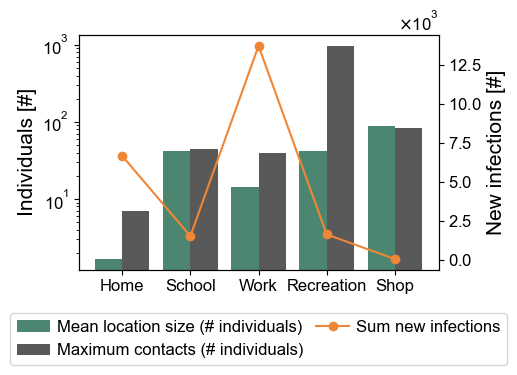

In [7]:
fig = plt.figure(figsize=(5, 3.5))
ax1 = fig.add_axes([0.14, 0.31, 0.72, 0.67])
ax2 = ax1.twinx()
bar_width = 0.4
x = np.arange(len(mean_loc_size.keys()))
# Mean location size bars
bar_colors1 = [colors['Teal'] for _ in range(len(mean_loc_size.keys()))]
bar1 = ax1.bar(x - bar_width/2, mean_loc_size.values(), bar_width, color = bar_colors1, label = 'Mean location size (# individuals)')
# Mean maximum contacts bars
bar_colors2 = [colors['Dark grey'] for _ in range(len(mean_loc_size.keys()))]
bar2 = ax1.bar(x + bar_width/2, mean_max_contacts.values(), bar_width, color = bar_colors2, label = 'Maximum contacts (# individuals)')
ax1.set_yscale('log')
ax1.set_ylabel('Individuals [#]')
# New infections
line1, = ax2.plot(mean_loc_size.keys(), mean_infections.values(), color = colors['Orange'], marker='o', label = 'Sum new infections')
ax2.set_ylabel('New infections [#]')

ax1.set_xticks(x)
ax1.set_xticklabels(mean_loc_size.keys())
formatter = ScalarFormatter(useMathText=True)
formatter.set_scientific(True)
formatter.set_powerlimits((3, 3))
ax2.yaxis.set_major_formatter(formatter)
lines = [bar1, bar2, line1]
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2, columnspacing=0.78, handletextpad=0.4)
plt.subplots_adjust(bottom=0.28, left=0.15, top=0.92, right=0.85)
fig.savefig('mean_loc_size.png', dpi=dpi)
plt.show()